# Background

Currently, the Yellow Taxi service is centered in Manhattan, because among other Boroughs, As of October 2021 Manhattan is the Borough with the highest population density and GDP. For GDP, Manhattan contributes 73.5% to New York City or it can be said that Manhattan is a business center, so it's not surprising that the Yellow Taxi service is "only centered" in the city of Manhattan.

Therefore, it is important for TLC that the Yellow Taxi service is evenly distributed to all Boroughs in New York City. With limited units, TLC must be able to optimize these units to respond to demand needs in order to avoid opportunity lost. 

# Objective

This project aims to create a model that can predict Yellow Taxi Demand in New York City.

# Problem Statement

Goal: Model able to predict Yellow Taxi demand

Research Question: How to predict Yellow Taxi demand?
Several regression models will be used to predict yellow taxi demand, the selected regression model is the model that has the lowest RMSE score.

# Methodology and Data

To be able to achieve the desired goal, the following things are carried out:
1. Perform data cleaning of the dataset
2. Explore data to understand problems and gain insight as a basis for providing recommendations for problem solutions
3. Create a simple baseline model as a comparison to the results of other models
4. Improve the baseline model by tuning parameter to see if there is an decrease in RMSE score.
5. Choose the model with the lowest RMSE score and interpret it.
6. Business Recommendations

Dataset source : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# 1. Import Packages

In [1]:
!pip install pyarrow

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import datetime as dt
import time
from datetime import datetime, timedelta


# 2. Loading Dataset 

In [3]:
df_1 = pd.read_parquet('yellow_tripdata_2022-10.parquet',engine='pyarrow')
df_2 = pd.read_excel('index PUborough.xlsx')
df_3 = pd.read_excel('index DOborough.xlsx')
df= pd.merge(df_1, df_2, on="PULocationID")
df= pd.merge(df, df_3, on="DOLocationID")
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUborough,DOborough
0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,249,107,1,...,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0,Manhattan,Manhattan
1,1,2022-10-01 00:24:42,2022-10-01 00:29:02,1.0,0.90,1.0,N,249,107,1,...,3.0,0.5,2.20,0.0,0.3,11.00,2.5,0.0,Manhattan,Manhattan
2,2,2022-10-01 00:25:37,2022-10-01 00:38:22,1.0,1.73,1.0,N,249,107,1,...,0.5,0.5,2.00,0.0,0.3,15.30,2.5,0.0,Manhattan,Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3599400 entries, 0 to 3599399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3599400.0,1.711521,0.453055,1.00,1.00,2.0,2.00,2.00
passenger_count,3473052.0,1.384962,0.932044,0.00,1.00,1.0,1.00,9.00
trip_distance,3599400.0,6.104752,643.379863,0.00,1.11,1.9,3.59,389678.46
RatecodeID,3473052.0,1.410415,5.697075,1.00,1.00,1.0,1.00,99.00
PULocationID,3599400.0,164.054895,64.564597,1.00,132.00,161.0,233.00,263.00
DOLocationID,3599400.0,161.952246,69.745949,1.00,113.00,162.0,234.00,263.00
payment_type,3599400.0,1.188614,0.538203,0.00,1.00,1.0,1.00,4.00
fare_amount,3599400.0,14.859324,13.215578,-797.00,7.00,10.5,17.00,950.00
extra,3599400.0,0.998132,1.246748,-22.18,0.00,0.5,2.50,10.80
mta_tax,3599400.0,0.488600,0.097461,-0.50,0.50,0.5,0.50,25.48


In [6]:
df['trip_time_minutes'] = abs(df['tpep_dropoff_datetime'].dt.minute - df['tpep_pickup_datetime'].dt.minute)
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUborough,DOborough,trip_time_minutes
0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,249,107,1,...,0.5,2.65,0.0,0.3,15.95,2.5,0.0,Manhattan,Manhattan,15
1,1,2022-10-01 00:24:42,2022-10-01 00:29:02,1.0,0.90,1.0,N,249,107,1,...,0.5,2.20,0.0,0.3,11.00,2.5,0.0,Manhattan,Manhattan,5
2,2,2022-10-01 00:25:37,2022-10-01 00:38:22,1.0,1.73,1.0,N,249,107,1,...,0.5,2.00,0.0,0.3,15.30,2.5,0.0,Manhattan,Manhattan,13


In [7]:
df.shape

(3599400, 22)

# 3. Data Cleansing

## 3.1 Missing Value Handling

In [8]:
# Missing Value Check
def missing_value_check (df) :
    null_number = (df.isnull().sum()/len(df))*100
    return null_number.sort_values(ascending = False)
missing_value_check(df)

passenger_count          3.510252
RatecodeID               3.510252
store_and_fwd_flag       3.510252
airport_fee              3.510252
congestion_surcharge     3.510252
VendorID                 0.000000
tip_amount               0.000000
DOborough                0.000000
PUborough                0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
extra                    0.000000
mta_tax                  0.000000
tpep_pickup_datetime     0.000000
fare_amount              0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
trip_time_minutes        0.000000
dtype: float64

In [9]:
# Drop missing value:
df = df.dropna()
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
PUborough                0
DOborough                0
trip_time_minutes        0
dtype: int64

There are no more missing value on dataset

## 3.2 Duplicated Value Handling

In [10]:
# Duplicated Value Check
df.duplicated().sum()

1

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

There are no more duplicated value on dataset

## 3.3 Abnormal Data Handling

In [12]:
# Drop trip duration 0 minutes, because trip duration > 0 minutes
df.drop(df[(df['trip_time_minutes'] == 0)].index, inplace=True)
# Drop data other than October
df.drop(df[(df['tpep_pickup_datetime'].dt.month != 10)].index, inplace=True)
# Drop data other than 2022
df.drop(df[(df['tpep_pickup_datetime'].dt.year != 2022)].index, inplace=True)
# Drop data trip distance = 0 miles, because trip distance > 0 miles
df.drop(df[(df['trip_distance'] == 0)].index, inplace=True)

In [13]:
df.shape

(3416987, 22)

In [14]:
# Abnormal Value Imputation
df.loc[df["passenger_count"] == 0, "passenger_count"] = df['passenger_count'].median()
df.loc[df["payment_type"] == 0, "payment_type"] = df['payment_type'].median()
df.loc[df["fare_amount"] <= 0, "fare_amount"] = df['fare_amount'].mean()
df.loc[df["extra"] < 0, "extra"] = df['extra'].mean()
df.loc[df["mta_tax"] < 0, "mta_tax"] = df['mta_tax'].mean()
df.loc[df["tip_amount"] < 0, "tip_amount"] = df['tip_amount'].mean()
df.loc[df["tolls_amount"] < 0, "tolls_amount"] = df['tolls_amount'].mean()
df.loc[df["improvement_surcharge"] < 0, "improvement_surcharge"] = df['improvement_surcharge'].mean()
df.loc[df["total_amount"] <= 0, "total_amount"] = df['total_amount'].mean()
df.loc[df["congestion_surcharge"] < 0, "congestion_surcharge"] = df['congestion_surcharge'].mean()
df.loc[df["airport_fee"] < 0, "airport_fee"] = df['airport_fee'].mean()
df.loc[df["RatecodeID"] == 99, "RatecodeID"] = df['RatecodeID'].median()

# 4. Exploratory Data Analysis

## 4.1 Top Pick up Borough

Manhattan        90.519338
Queens            8.849756
Brooklyn          0.539101
Bronx             0.084402
Staten Island     0.005180
EWR               0.002224
Name: PUborough, dtype: float64


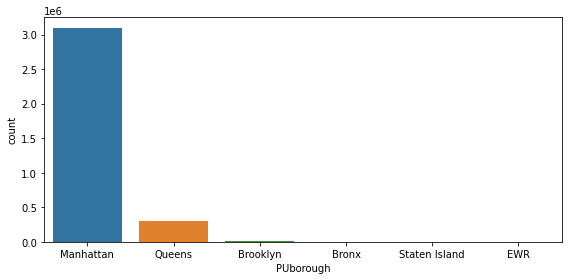

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'PUborough',
              data = df,
              order = df['PUborough'].value_counts().index)
plt.tight_layout()
print(df['PUborough'].value_counts() / df['PUborough'].count() * 100)

Manhattan dominates taxi pick ups by 90.5%

## 4.2 Top Drop Off Borough

Manhattan        89.932739
Queens            5.400167
Brooklyn          3.841220
Bronx             0.524761
EWR               0.279193
Staten Island     0.021920
Name: DOborough, dtype: float64


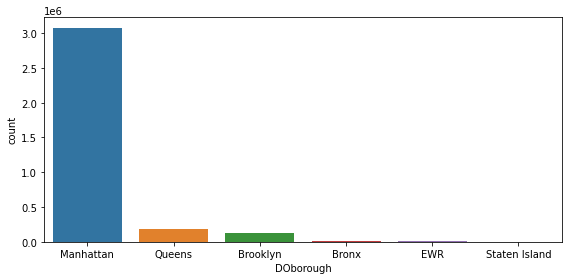

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'DOborough',
              data = df,
              order = df['DOborough'].value_counts().index)
plt.tight_layout()
print(df['DOborough'].value_counts() / df['DOborough'].count() * 100)

Manhattan dominates the taxi drop off at 89.9%

## 4.3 Trip Summary

In [17]:
tripsmry=df.groupby(['PUborough','DOborough']).agg({'passenger_count':'mean', 'trip_distance':'mean', 'total_amount':'mean','trip_time_minutes':'mean','RatecodeID':'count'}).sort_values("total_amount", ascending=False)
tripsmry

passenger_count  trip_distance  total_amount  \
PUborough     DOborough                                                     
Bronx         EWR                   1.500000      25.165000    191.325000   
Queens        EWR                   1.449275      33.595072    154.922812   
EWR           Queens                1.000000      46.055000    107.325000   
              Brooklyn              1.000000      31.270000    105.600000   
              Staten Island         1.000000      23.740000    103.860000   
Brooklyn      EWR                   1.339623      18.160377    101.006415   
Manhattan     EWR                   1.620853      17.541237    100.296029   
Queens        Staten Island         1.401813      26.974048     91.277455   
EWR           EWR                   1.734375       2.983437     90.413400   
Staten Island EWR                   2.000000      14.526667     87.183333   
EWR           Manhattan             1.250000      17.997500     84.547500   
Bronx         Staten Island         1.000000      24.666667     81.100000   
Staten Island Queens                1.055556      24.105000     80.640000   
Manhattan     Staten Island         1.448980      19.183707     80.528886   
Staten Island Bronx                 1.000000      27.025000     78.862500   
              Manhattan             1.000000      18.097959     76.166735   
Bronx         Brooklyn              1.053333      18.021689     65.081556   
Queens        Manhattan             1.488136      14.644834     61.493945   
Brooklyn      Bronx                 1.028571      17.907429     61.378500   
Staten Island Brooklyn              1.050000      17.975833     60.638333   
Queens        Bronx                 1.371839      16.118392     58.575705   
Brooklyn      Staten Island         1.051282      17.188718     57.986667   
Queens        Brooklyn              1.360807      14.234005     50.008171   
Manhattan     Queens                1.454077      11.165359     49.065448   
Bronx         Queens                1.096774      11.802627     47.031198   
Brooklyn      Queens                1.398799      11.431604     43.101291   
Manhattan     Bronx                 1.358908       8.715453     35.013433   
              Brooklyn              1.392657       6.560599     33.105638   
Bronx         Manhattan             1.155031       6.978460     31.612664   
Brooklyn      Manhattan             1.393087       5.959266     30.815378   
Queens        Queens                1.401065       7.285355     30.345351   
Staten Island Staten Island         1.179487       1.791795     23.448205   
Bronx         Bronx                 1.177397       3.211438     20.365968   
Brooklyn      Brooklyn              1.334064       2.670022     16.769276   
Manhattan     Manhattan             1.399092       2.054017     16.395209   

                             trip_time_minutes  RatecodeID  
PUborough     DOborough                                     
Bronx         EWR                    10.500000           2  
Queens        EWR                    16.321739         345  
EWR           Queens                 25.000000           2  
              Brooklyn                1.000000           1  
              Staten Island           2.000000           1  
Brooklyn      EWR                    20.773585          53  
Manhattan     EWR                    24.371211        9073  
Queens        Staten Island          19.193353         331  
EWR           EWR                     4.671875          64  
Staten Island EWR                    28.000000           3  
EWR           Manhattan              17.250000           8  
Bronx         Staten Island          19.333333           6  
Staten Island Queens                 20.500000          18  
Manhattan     Staten Island          23.537415         294  
Staten Island Bronx                  16.750000           8  
              Manhattan              18.530612          49  
Bronx         Brooklyn               19.106667         225  
Queens        Manhat

Observasi: 
1. Trips within Manhattan are the most frequent trips with 2,875,897 trips. 
2. Trips to Brooklyn and Staten Island are the fewest trips, only 1 trip.
3. Trips from State Island to EWR are the trips with the most passengers with an average of 2 passengers.
4. Trips from EWR to Queens, Brooklyn and Staten Island are the trips with the least number of passengers, that is, an average of 1 person
5. Trips between Boroughs from EWR and to Queend are the trips with the farthest routes with an average of 46 miles
6. Trips between Boroughs from Brooklyn and to Manhattan are the trips with the shortest routes. with an average of 5.9 miles
7. Trip within the Borough Longest is the Bronx with an average of 3.2 miles
8. Trip within the Shortest Borough is Staten Island with an average of 1.7 miles
9. The longest trip between Boroughs is from Statend Island to EWR with an average travel time of 28 minutes
10. The fastest trip between Boroughs is from EWR to Brooklyn with an average travel time of 1 minute.
11. The longest trip inside The Borough is the Bronx with an average travel time of 21.9 minutes
12. The fastest trip within the Borough is EWR with an average travel time of 4.6 minutes
13. The most expensive total_amount trip is from the Bronx to EWR with an average of 191 USD
14. Trips within Manhattan are the trip with the lowest total_amount, with an average of 19 USD


## 4.4 Pick up Time

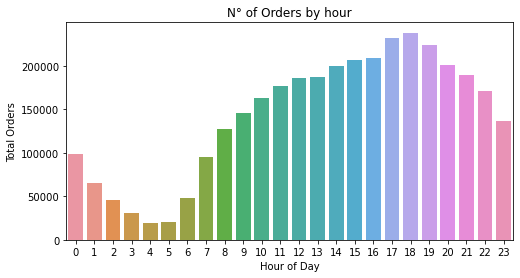

In [18]:
plt.figure(figsize = (8,4))
# Orders by hour
orderbyhour = df.groupby(df["tpep_pickup_datetime"].dt.hour)["PUborough"].count().reset_index().sort_values(by="tpep_pickup_datetime", ascending=False)
orderbyhour.rename(columns={"PUborough":"Total Orders", "tpep_pickup_datetime": "Hour of Day"}, inplace=True)
orderbyhour_ax = sns.barplot(x="Hour of Day", y="Total Orders", data=orderbyhour)
orderbyhour_ax.set_title("N° of Orders by hour")
plt.show()

The number of pick-ups starts to increase from 7 AM and reaches its peak at 18.00 which is the time to go home from work.

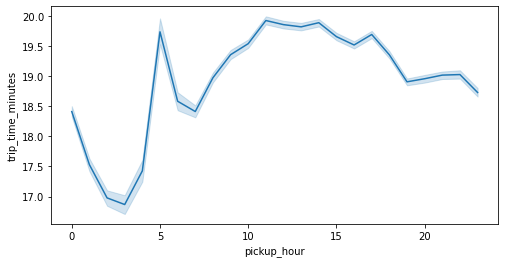

In [19]:
plt.figure(figsize = (8,4))
df_time = df.copy()
df_time['pickup_hour'] = df_time['tpep_pickup_datetime'].dt.hour  
df_time['pickup_year'] = df_time['tpep_pickup_datetime'].dt.year
df_time['pickup_month'] = df_time['tpep_pickup_datetime'].dt.month
df_time['pickup_day'] = df_time['tpep_pickup_datetime'].dt.day_name()
sns.lineplot(x='pickup_hour',y='trip_time_minutes',data=df_time)
plt.show()

5 AM is the time with the longest trip duration, while productive time (7-18) has relatively the same trip duration

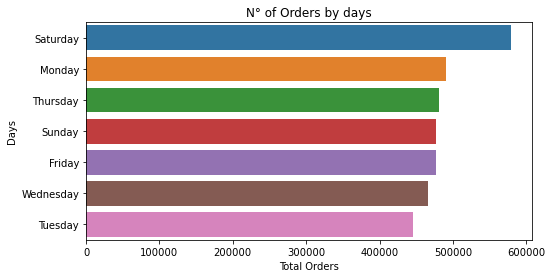

In [20]:
plt.figure(figsize = (8,4))
# Orders by days
orderbydays = df.groupby(df["tpep_pickup_datetime"].dt.day_name())["PUborough"].count().reset_index().sort_values(by="tpep_pickup_datetime", ascending=False)
orderbydays.rename(columns={"tpep_pickup_datetime":"Days", "PUborough": "Total Orders"}, inplace=True)
orderbydays = orderbydays.sort_values(by="Total Orders", ascending=False)
orderbydays = sns.barplot(x="Total Orders", y="Days", data=orderbydays)
orderbydays.set_title("N° of Orders by days")
plt.show()

Saturday was the day with the largest number of pick-ups, while Wednesday and Tuesday were the days with the least number of pick-ups

## 4.5 Payment Type

1    79.722516
2    19.032323
4     0.817270
3     0.427892
Name: payment_type, dtype: float64


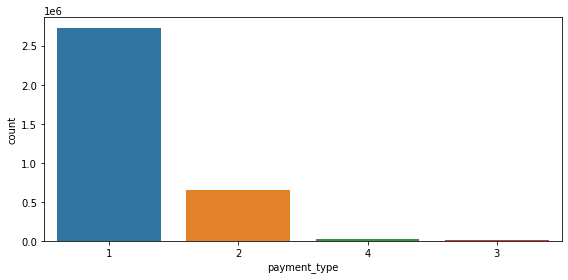

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'payment_type',
              data = df,
              order = df['payment_type'].value_counts().index)
plt.tight_layout()
print(df['payment_type'].value_counts() / df['payment_type'].count() * 100)

Most payments are using a credit card, namely 79.7%

## 4.6 Rate Code

1.0    95.237559
2.0     4.186349
5.0     0.290987
3.0     0.268804
4.0     0.016038
6.0     0.000263
Name: RatecodeID, dtype: float64


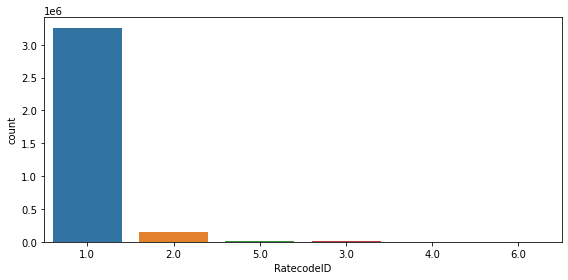

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'RatecodeID',
              data = df,
              order = df['RatecodeID'].value_counts().index)
plt.tight_layout()
print(df['RatecodeID'].value_counts() / df['RatecodeID'].count() * 100)

95.2% rate is the standard rate

# 5. Data Preprocessing

## 5.1 Trip Clustering 

Trip clustering is used to facilitate analysis because there are so many trip combinations, therefore it is simplified to just 30 clusters

In [23]:
from sklearn.cluster import MiniBatchKMeans, KMeans

coord = df[["PULocationID", "DOLocationID"]].values
regions = MiniBatchKMeans(n_clusters = 30,  batch_size  = 10000).fit(coord)

In [24]:
cluster_column = regions.predict(df[["PULocationID", "DOLocationID"]])
df["pickup_cluster"] = cluster_column

C:\Users\azakf\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [25]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUborough,DOborough,trip_time_minutes,pickup_cluster
0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,249,107,1,...,2.65,0.0,0.3,15.95,2.5,0.0,Manhattan,Manhattan,15,13
1,1,2022-10-01 00:24:42,2022-10-01 00:29:02,1.0,0.90,1.0,N,249,107,1,...,2.20,0.0,0.3,11.00,2.5,0.0,Manhattan,Manhattan,5,13
2,2,2022-10-01 00:25:37,2022-10-01 00:38:22,1.0,1.73,1.0,N,249,107,1,...,2.00,0.0,0.3,15.30,2.5,0.0,Manhattan,Manhattan,13,13


In [26]:
# Pick up time feature is rounded up in hours
df_n = df.copy()
df_n['tpep_pickup_datetime'] =  df_n['tpep_pickup_datetime'].apply(lambda x : pd.to_datetime(x).replace(minute=0, second=0) + timedelta(hours=1))

In [27]:
# Grouping time in hours to find out the number of pick ups that occurred at that hour
df_n = df_n.groupby(['tpep_pickup_datetime','pickup_cluster']).size().reset_index(name='count')
df_n.head(3)

,tpep_pickup_datetime,pickup_cluster,count
0,2022-10-01 01:00:00,0,117
1,2022-10-01 01:00:00,1,278
2,2022-10-01 01:00:00,2,118


In [28]:
df_z = df_n.copy()

In [29]:
# The number of pick ups is converted to a ratio based on the highest number of pick ups
df_z['count'] = df_z['count'].apply(lambda x :  (x /  df_z['count'].max()))
df_z.head(3)

,tpep_pickup_datetime,pickup_cluster,count
0,2022-10-01 01:00:00,0,0.106267
1,2022-10-01 01:00:00,1,0.252498
2,2022-10-01 01:00:00,2,0.107175


In [30]:
df_z['day'] = pd.DatetimeIndex(df_z['tpep_pickup_datetime']).day
df_z['dayofweek'] = pd.DatetimeIndex(df_z['tpep_pickup_datetime']).dayofweek
df_z['hour'] = pd.DatetimeIndex(df_z['tpep_pickup_datetime']).hour
df_z.head(3)

,tpep_pickup_datetime,pickup_cluster,count,day,dayofweek,hour
0,2022-10-01 01:00:00,0,0.106267,1,5,1
1,2022-10-01 01:00:00,1,0.252498,1,5,1
2,2022-10-01 01:00:00,2,0.107175,1,5,1


In [31]:
df_z.describe()

,pickup_cluster,count,day,dayofweek,hour
count,22308.000000,22308.000000,22308.00000,22308.000000,22308.000000
mean,14.501076,0.139122,16.00139,3.060203,11.503721
std,8.656086,0.120509,8.94460,2.078309,6.922328
min,0.000000,0.000908,1.00000,0.000000,0.000000
25%,7.000000,0.054496,8.00000,1.000000,6.000000
50%,14.500000,0.110808,16.00000,3.000000,12.000000
75%,22.000000,0.187103,24.00000,5.000000,18.000000
max,29.000000,1.000000,31.00000,6.000000,23.000000


## 5.2 Train and Test Data

In [32]:
feature = df_z[['pickup_cluster', 'day', 'hour', 'dayofweek']]
target = df_z['count']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
     feature, target, test_size=0.33, random_state=42)

## 5.3 Multicolinearity Check

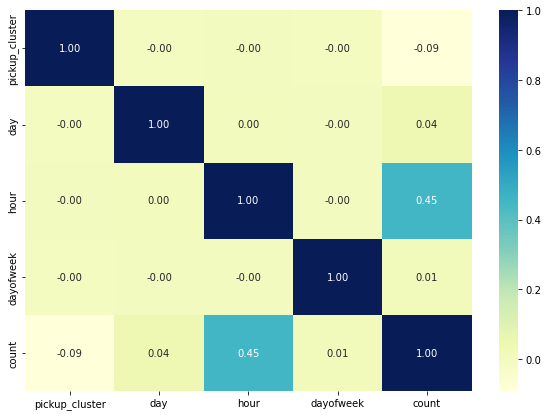

In [34]:
# heatmap correlation
traffic_train = pd.concat([X_train, y_train], axis=1)
corr = traffic_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

no multicollinearity and strong correlation between features were found

# 6. Modeling

## 6.1 Baseline Model

### 6.1.1 Linear Regression

In [35]:
# define the model
simple_reg = LinearRegression()

# train the model
X_train_model = X_train.to_numpy()
y_train_model = y_train.to_numpy()
y_train_model = y_train_model.reshape(len(y_train,))

simple_reg.fit(X_train_model, y_train_model)

LinearRegression()

In [36]:
#Training Error
y_predict_train  = simple_reg.predict(X_train_model)
print('R-squared for training data is {}'.format(r2_score(y_train_model, y_predict_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_model, y_predict_train))))

R-squared for training data is 0.21546560672455262
RMSE for training data is 0.10643523422196627


In [37]:
#Testing Error
X_test_model = X_test.to_numpy()
y_predict_test = simple_reg.predict(X_test_model)

y_test_model = y_test.to_numpy()
y_test_model = y_test_model.reshape(len(y_test_model),)

In [38]:
print('R-squared for training data is {}'.format(r2_score(y_test_model, y_predict_test)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_model, y_predict_test))))

R-squared for training data is 0.22629704309040155
RMSE for testing data is 0.10659927491719809


### 6.1.2 Decision Tree Regression

In [39]:
dt = DecisionTreeRegressor(random_state=42)
# train the model
X_train_model_dt = X_train.to_numpy()
y_train_model_dt= y_train.to_numpy()
y_train_model_dt = y_train_model_dt.reshape(len(y_train))

dt.fit(X_train_model_dt, y_train_model_dt)

DecisionTreeRegressor(random_state=42)

In [40]:
#Training Error
y_predict_train_dt  = dt.predict(X_train_model_dt)
print('R-squared for training data is {}'.format(r2_score(y_train_model_dt, y_predict_train_dt)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_model_dt, y_predict_train_dt))))

R-squared for training data is 1.0
RMSE for training data is 0.0


In [41]:
#Testing Error
X_test_model_dt = X_test.to_numpy()
y_predict_test_dt = dt.predict(X_test_model_dt)

y_test_model_dt = y_test.to_numpy()
y_test_model_dt = y_test_model_dt.reshape(len(y_test_model_dt))

In [42]:
print('R-squared for training data is {}'.format(r2_score(y_test_model_dt, y_predict_test_dt)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_model_dt, y_predict_test_dt))))

R-squared for training data is 0.960495770559213
RMSE for testing data is 0.02408734426795828


### 6.1.3 Random Forest Regression

In [43]:
rf = RandomForestRegressor(random_state=42)
# train the model
X_train_model_rf = X_train.to_numpy()
y_train_model_rf = y_train.to_numpy()
y_train_model_rf = y_train_model_rf.reshape(len(y_train,))

rf.fit(X_train_model_rf, y_train_model_rf)

RandomForestRegressor(random_state=42)

In [44]:
#Training Error
y_predict_train_rf  = rf.predict(X_train_model_rf)
print('R-squared for training data is {}'.format(r2_score(y_train_model_rf, y_predict_train_rf)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_model_rf, y_predict_train_rf))))

R-squared for training data is 0.9966342714641772
RMSE for training data is 0.0069713834154496055


In [45]:
#Testing Error
X_test_model_rf = X_test.to_numpy()
y_predict_test_rf = rf.predict(X_test_model_rf)

y_test_model_rf = y_test.to_numpy()
y_test_model_rf = y_test_model_rf.reshape(len(y_test_model_rf))

In [46]:
print('R-squared for training data is {}'.format(r2_score(y_test_model_rf, y_predict_test_rf)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_model_rf, y_predict_test_rf))))

R-squared for training data is 0.9749981978098072
RMSE for testing data is 0.019162526997759746


### 6.1.4 Result

In [47]:
results={}
results["Linear Regression"]=np.sqrt(mean_squared_error(y_test_model, y_predict_test))
results["Decision Tree Regression"]= np.sqrt(mean_squared_error(y_test_model_dt, y_predict_test_dt))
results["Random Forest Regression"]= np.sqrt(mean_squared_error(y_test_model_rf, y_predict_test_rf))
results = pd.DataFrame.from_dict(results,orient='index')
results.columns=["RMSE Score"] 
results.sort_values(['RMSE Score'], ascending=True)

,RMSE Score
Random Forest Regression,0.019163
Decision Tree Regression,0.024087
Linear Regression,0.106599


The Random Forest Regression model will be used to predict demand pick up because it has the smallest RMSE Score, but improvements need to be made with parameter tuning to get maximum results

## 6.2 Improvement Model

In [48]:
%%time
# Random Forest Model Improvement
# hyperparameter tuning
df_improvement_rf = RandomForestRegressor(random_state=42)
parameters = {
    'n_estimators': (50,100,500),
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6],
    'max_depth':(1,2,3,None)
}
         
rf_clf_gridcv = GridSearchCV(df_improvement_rf, parameters, cv=3, scoring='neg_root_mean_squared_error')
rf_clf_gridcv.fit(X_train_model_rf, y_train_model_rf)

CPU times: total: 6min 30s
Wall time: 6min 36s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': (1, 2, 3, None),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': (50, 100, 500)},
             scoring='neg_root_mean_squared_error')

In [49]:
# The best parameter of Random Forest Regression
rf_clf_gridcv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [50]:
y_pred_df_improvement_rf = rf_clf_gridcv.best_estimator_.predict(X_test_model_rf)
print('R-squared for improvement model is {}'.format(r2_score(y_test_model_rf, y_pred_df_improvement_rf)))
print('RMSE for improvement model is {}'.format(np.sqrt(mean_squared_error(y_test_model_rf, y_pred_df_improvement_rf))))

R-squared for improvement model is 0.9753769224537405
RMSE for improvement model is 0.01901683720727654


## 6.3 Conclusion

In [51]:
results={}
results["Linear Regression"]=np.sqrt(mean_squared_error(y_test_model, y_predict_test))
results["Decision Tree Regression"]= np.sqrt(mean_squared_error(y_test_model_dt, y_predict_test_dt))
results["Random Forest Regression"]= np.sqrt(mean_squared_error(y_test_model_rf, y_predict_test_rf))
results["Random Forest Regression Improvement"]= np.sqrt(mean_squared_error(y_test_model_rf, y_pred_df_improvement_rf))
results = pd.DataFrame.from_dict(results,orient='index')
results.columns=["RMSE Score"] 
results.sort_values(['RMSE Score'], ascending=True)

,RMSE Score
Random Forest Regression Improvement,0.019017
Random Forest Regression,0.019163
Decision Tree Regression,0.024087
Linear Regression,0.106599


The Random Forest Regression Improvement model will be used to predict pick-up demand because it has the smallest RMSE Score

# 6.5 Feature Importance

         Variable  Importance
0  pickup_cluster   54.823503
2            hour   36.848197
3       dayofweek    6.691280
1             day    1.637021


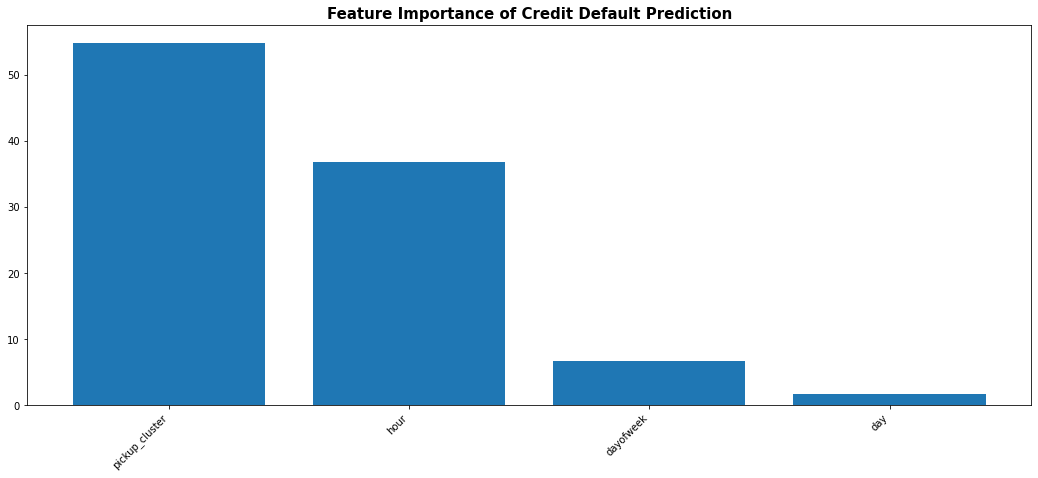

In [52]:
feature_importance = pd.DataFrame({'Variable':X_train.columns,
                      'Importance':rf_clf_gridcv.best_estimator_.feature_importances_*100}).sort_values('Importance', ascending=False)
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(feature_importance['Variable'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
ax.set_title('Feature Importance of Credit Default Prediction', fontsize=15, fontweight='bold')
plt.show
print(feature_importance)

91% of the most important features that influence demand prediction are influenced by the pick_up cluster and hour features

# 7. Recommendation

1. 	By using the Random Forest Regression model, TLC can focus on cluster pick_up data and hours to determine the number of units to deploy by adjusting the predicted demand results, so TLC can reduce demand and supply imbalances more measurably.
2. 	Create a route rotation policy for drivers so that units are not spread over certain locations.
3. 	Make a balanced policy for drivers based on the number of trips and mileage.
